# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [1]:
# Rubric 1 - Package Imports - All the necessary packages and modules are imported in the first cell of the notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from PIL import Image
import shutil
import os

## Load the data

Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/master/torchvision/transforms.html#)). The data should be included alongside this notebook, otherwise you can [download it here](https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz). The dataset is split into three parts, training, validation, and testing. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. You'll also need to make sure the input data is resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

For all three sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. This converts the values of each color channel to be between -1 and 1 instead of 0 and 1.

In [2]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [3]:
# TODO: Define your transforms for the training, validation, and testing sets
# Rubric 2 - Training data augmentation torchvision transforms are used to augment the training data with random scaling, rotations, mirroring, and/or cropping
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader


train_transforms = transforms.Compose([
    transforms.RandomRotation(30),     
    transforms.RandomResizedCrop(224),  
    transforms.RandomHorizontalFlip(),  
    transforms.ToTensor(),              
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  
])

# Rubric 3 - Data normalization: The training, validation, and testing data is appropriately cropped and normalized
valid_test_transforms = transforms.Compose([
    transforms.Resize(256),           
    transforms.CenterCrop(224),        
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# TODO: Load the datasets with ImageFolder

# Rubric 4: Data loading: The data for each set (train, validation, test) is loaded with torchvision's ImageFolder

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=valid_test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders

# Rubric 5: Data batching The data for each set is loaded with torchvision's DataLoader

batch_size = 64  

# data loaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Print 
print(f"Number of batches in training loader: {len(train_loader)}")
print(f"Total number of samples in training loader: {len(train_loader.dataset)}")

print(f"Number of batches in validation loader: {len(valid_loader)}")
print(f"Total number of samples in validation loader: {len(valid_loader.dataset)}")

print(f"Number of batches in test loader: {len(test_loader)}")
print(f"Total number of samples in test loader: {len(test_loader.dataset)}")

# Iterate to confirm the loading
for inputs, labels in train_loader:
    print("Batch of inputs shape:", inputs.shape)
    print("Batch of labels shape:", labels.shape)
    break  # Print the first batch 



Number of batches in training loader: 103
Total number of samples in training loader: 6552
Number of batches in validation loader: 13
Total number of samples in validation loader: 818
Number of batches in test loader: 13
Total number of samples in test loader: 819
Batch of inputs shape: torch.Size([64, 3, 224, 224])
Batch of labels shape: torch.Size([64])


### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [4]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! You can also ask questions on the forums or join the instructors in office hours.

Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

In [5]:
# TODO: Build and train your network
# # Rubric 6 Pretrained Network: A pretrained network such as VGG16 is loaded from torchvision.models and the parameters are frozen
model = models.vgg16(pretrained=True)

# Freeze the pre-trained layers 
for param in model.parameters():
    param.requires_grad = False

# Rubric 7 Feedforward Classifier: A new feedforward network is defined for use as a classifier using the features as input

classifier_input_size = model.classifier[0].in_features
classifier = nn.Sequential(
    nn.Linear(classifier_input_size, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, len(cat_to_name)),  
    nn.LogSoftmax(dim=1)
)
model.classifier = classifier

# loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

# GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Rubric 8 Training the network: The parameters of the feedforward classifier are appropriately trained, while the parameters of the feature network are left static

# Rubric 9 Validation Loss and Accuracy:During training, the validation loss and accuracy are displayed

epochs = 20  
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        print ("Training")
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print training loss
    print(f"Epoch {epoch+1}/{epochs} - Training Loss: {running_loss/len(train_loader)}")

# validate  model 


model.eval()
accuracy = 0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        ps = torch.exp(outputs)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

print(f"Validation Accuracy: {accuracy/len(valid_loader)}")


C:\Users\raghs\anaconda3\envs\ImageClassifier\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\raghs\anaconda3\envs\ImageClassifier\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Epoch 1/20 - Training Loss: 2.555757233240072
Training
Training
Training


Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Epoch 9/20 - Training Loss: 0.7017969471737019
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training

Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Epoch 17/20 - Training Loss: 0.6143849924640749
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Training
Trainin

## Testing your network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [6]:
# TODO: Do validation on the test set
# Rubric 10 Testing Accuracy:The network's accuracy is measured on the test data
model.eval()
test_accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        ps = torch.exp(outputs)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))

print(f"Test Accuracy: {test_accuracy/len(test_loader)}")

Test Accuracy: 0.8914734125137329


## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [7]:
# TODO: Save the checkpoint 

checkpoint_path = 'imageclassifier_checkpoint.pth'

# Rubric 11 Saving the model:The trained model is saved as a checkpoint along with associated hyperparameters and the class_to_idx dictionary
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'classifier': model.classifier,
    'class_to_idx': train_dataset.class_to_idx,  
}

torch.save(checkpoint, checkpoint_path)

print(f"Model checkpoint saved at {checkpoint_path}")

Model checkpoint saved at imageclassifier_checkpoint.pth


## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [8]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

# Rubric 12 Loading checkpoints:There is a function that successfully loads a checkpoint and rebuilds the model


def checkpoint_loader(checkpointFile):
    checkpoint = torch.load(checkpointFile)
    
    # Load the pre-trained model architecture (assuming VGG16 here)
    model = models.vgg16(pretrained=True)
    
    # Replace the classifier with the one saved in the checkpoint
    model.classifier = checkpoint['classifier']
    
    # Load the model state and optimizer state
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    
    # Load class-to-index mapping if available (optional)
    class_to_idx = checkpoint.get('class_to_idx', None)
    
    return model, optimizer, class_to_idx






# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [9]:
# Rubric 13 Image Processing:The process_image function successfully converts a PIL image into an object that can be used as input to a trained model

def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model
      # Load the image using PIL
    img = Image.open(image_path)
    
    # Resize the image while preserving aspect ratio
    img.thumbnail((256, 256))
    
    # Center-crop the image to 224x224
    left_margin = (img.width - 224) / 2
    top_margin = (img.height - 224) / 2
    right_margin = left_margin + 224
    bottom_margin = top_margin + 224
    img = img.crop((left_margin, top_margin, right_margin, bottom_margin))
    
    # Convert PIL image to NumPy array
    np_image = np.array(img) / 255.0  # Normalize pixel values to 0-1 range
    
    # Normalize the image using mean and standard deviation
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
    
    # Reorder dimensions to match PyTorch's expectation (color channel as the first dimension)
    np_image = np_image.transpose((2, 0, 1))
    
    # Convert NumPy array to a PyTorch tensor
    torch_image = torch.tensor(np_image, dtype=torch.float32)
    
    return torch_image

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [10]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

<Axes: >

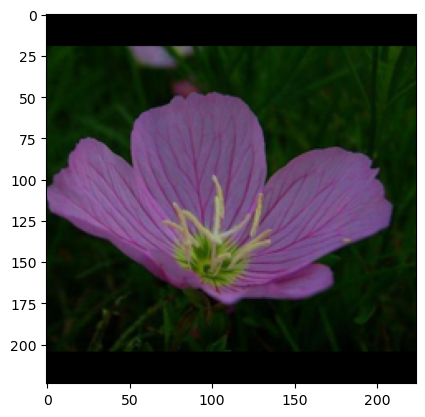

In [11]:
from PIL import Image

# Load the image from the file path using PIL
image_path =  "flowers/test/1/image_06752.jpg"
loaded_image = Image.open(image_path)

# Preprocess the loaded image to get a PyTorch tensor
processed_image = process_image(loaded_image)

# Display the processed image using imshow
imshow(processed_image, title='Processed Image')

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [12]:
# Rubric 14 Class Prediction:The predict function successfully takes the path to an image and a checkpoint, then returns the top K most probably classes for that image

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
       # Set the model to evaluation mode
    model.eval()
    
    # Process the image
    image = process_image(image_path)
    
    # Convert the image to a PyTorch tensor and move it to the device
    image = image.to(device)
    
    # Add a batch dimension (as the model expects a batch of images)
    image = image.unsqueeze(0)
    
    # Perform a forward pass to get the raw probabilities
    with torch.no_grad():
        output = model(image)
    
    # Calculate the class probabilities
    probabilities = torch.exp(output)
    
    # Get the top K probabilities and their corresponding class indices
    top_probs, top_indices = probabilities.topk(topk)
    
    idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}
    
        
    # Convert class indices to actual class labels
    #idx_to_class = {v: k for k, v in model.class_to_idx.items()}
    top_classes = [idx_to_class[idx] for idx in top_indices.cpu().numpy()[0]]
    
    
    
    return top_probs.cpu().numpy()[0], top_classes


In [13]:

image_path = 'flowers/test/1/image_06752.jpg'  # Replace with the path to the image you want to predict


checkpoint_file_path = 'imageclassifier_checkpoint.pth'   # Replace with the actual path to your checkpoint file
loaded_model, loaded_optimizer, class_to_idx = checkpoint_loader(checkpoint_file_path)


# Make predictions
probs, classes = predict(image_path, loaded_model, topk=5)
print(probs)
print(classes)

[0.6243878  0.1892399  0.16481063 0.01192409 0.00528911]
['1', '26', '55', '65', '34']


## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [14]:
# TODO: Display an image along with the top 5 classes

# Rubric 15 Sanity Checking with matplotlib:A matplotlib figure is created displaying an image and its associated top 5 most probable classes with actual flower names

def display(probs, classes, topk=5):
    
      
    # Convert class labels to flower names using cat_to_name mapping
    flower_names = [cat_to_name[label] for label in classes]

    # Display the input image along with the top predicted class label
    img = Image.open(image_path)
    plt.figure(figsize=(6, 10))
    
    # Include the top predicted class label in the title
    top_label = flower_names[0]
    plt.title(f'Top Prediction: {top_label}')
    
    ax1 = plt.subplot(2, 1, 1)
    ax1.imshow(img)
    ax1.axis('off')
   

    # Plot the top K predicted classes and their probabilities with flower names
    plt.subplot(2, 1, 2)
    plt.barh(flower_names, probs)
    plt.xlabel('Probability')
    plt.title('Top {} Predicted Flower Classes'.format(topk))
    plt.gca().invert_yaxis()  # Invert the y-axis to show the highest probability at the top
    plt.show()

[0.6243878  0.1892399  0.16481063 0.01192409 0.00528911]
['1', '26', '55', '65', '34']


C:\Users\raghs\AppData\Local\Temp\ipykernel_25384\1740476.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 1, 1)


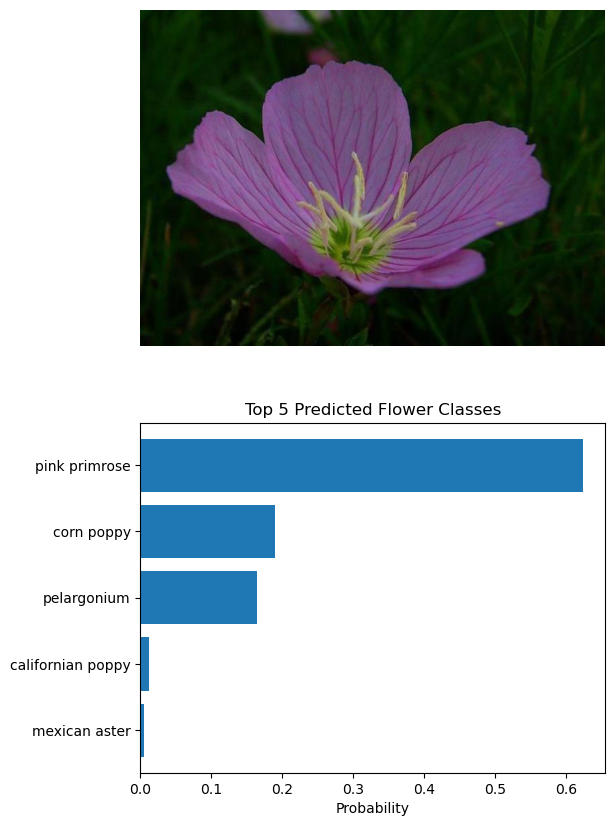

In [15]:
probs, classes = predict(image_path, loaded_model, topk=5)
print(probs)
print(classes)
display(probs, classes)